In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

# Reading the data

In [37]:
data_file_path = "../final_data/data/TSLA_hourly_processed_without_NAN.xlsx"
df = pd.read_excel(data_file_path, parse_dates=['Datetime'], index_col='Datetime')



In [38]:
df.head()


,Open,High,Low,Close,Volume,SMA_5,SMA_20,SMA_50,SMA_200,EMA_5,...,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Mid,Bollinger_Lower,VWAP,Candle_Width,% Change,OBV,Cumulative_Return
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-15 17:30:00,168.061798,168.130005,166.919998,167.419998,10659451,167.069699,168.681816,168.631487,172.243849,167.519863,...,-0.344710,-0.079242,171.777470,168.681816,165.586162,171.989048,-0.641800,-0.386749,3217101597,-0.135763
2023-05-15 18:30:00,167.419998,167.490005,165.809998,166.089905,10698775,167.036121,168.558811,168.721086,172.118157,167.043210,...,-0.469011,-0.157196,171.864870,168.558811,165.252752,171.970865,-1.330093,-0.794465,3217101596,-0.142629
2023-05-15 19:30:00,166.089996,166.539993,165.649994,166.354996,6975517,167.117120,168.467061,168.816185,171.991735,166.813805,...,-0.539906,-0.233738,171.915021,168.467061,165.019100,171.959601,0.264999,0.159607,3231052629,-0.141261
2023-05-16 13:30:00,165.649994,167.559998,164.350006,167.470001,28269977,167.080981,168.381561,168.941085,171.868285,167.032537,...,-0.500352,-0.287061,171.839875,168.381561,164.923247,171.923401,1.820007,0.670257,3287592582,-0.135505
2023-05-16 14:30:00,167.449997,169.419998,167.160004,168.580002,18020917,167.182980,168.367776,168.975285,171.754886,167.548359,...,-0.375113,-0.304671,171.820326,168.367776,164.915227,171.906305,1.130005,0.662806,3323634415,-0.129775


In [39]:
print("Index type:", type(df.index))
print("Index values:", df.index)

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index values: DatetimeIndex(['2023-05-15 17:30:00', '2023-05-15 18:30:00',
               '2023-05-15 19:30:00', '2023-05-16 13:30:00',
               '2023-05-16 14:30:00', '2023-05-16 15:30:00',
               '2023-05-16 16:30:00', '2023-05-16 17:30:00',
               '2023-05-16 18:30:00', '2023-05-16 19:30:00',
               ...
               '2025-03-31 17:30:00', '2025-03-31 18:30:00',
               '2025-03-31 19:30:00', '2025-04-01 13:30:00',
               '2025-04-01 14:30:00', '2025-04-01 15:30:00',
               '2025-04-01 16:30:00', '2025-04-01 17:30:00',
               '2025-04-01 18:30:00', '2025-04-01 19:30:00'],
              dtype='datetime64[ns]', name='Datetime', length=3280, freq=None)


In [40]:
df.index = pd.to_datetime(df.index)  # Convert strings to datetime

In [41]:
import pandas as pd

# Assuming 'Datetime' is already the index
df['day_of_week'] = df.index.dayofweek                # 0=Monday, 6=Sunday
df['day_name'] = df.index.day_name()                  # "Monday"
df['is_weekend'] = df['day_of_week'].isin([5, 6])     # True for Sat/Sun
df['month'] = df.index.month                          # 1-12
df['month_name'] = df.index.month_name()              # "January"
df['month_abbr'] = df.index.strftime('%b')            # "Jan"

# Season mapping (meteorological)
season_map = {
    1: 'Winter', 2: 'Winter', 3: 'Spring',  
    4: 'Spring', 5: 'Spring', 6: 'Summer',  
    7: 'Summer', 8: 'Summer', 9: 'Fall',  
    10: 'Fall', 11: 'Fall', 12: 'Winter'
}
df['season'] = df['month'].map(season_map)

In [42]:
df = df.iloc[3:, :]

In [43]:
df.head(10)

,Open,High,Low,Close,Volume,SMA_5,SMA_20,SMA_50,SMA_200,EMA_5,...,% Change,OBV,Cumulative_Return,day_of_week,day_name,is_weekend,month,month_name,month_abbr,season
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-16 13:30:00,165.649994,167.559998,164.350006,167.470001,28269977,167.080981,168.381561,168.941085,171.868285,167.032537,...,0.670257,3287592582,-0.135505,1,Tuesday,False,5,May,May,Spring
2023-05-16 14:30:00,167.449997,169.419998,167.160004,168.580002,18020917,167.182980,168.367776,168.975285,171.754886,167.548359,...,0.662806,3323634415,-0.129775,1,Tuesday,False,5,May,May,Spring
2023-05-16 15:30:00,168.564896,169.518402,167.919998,168.429993,11617670,167.384979,168.334251,168.972435,171.641835,167.842237,...,-0.088984,3323634414,-0.130549,1,Tuesday,False,5,May,May,Spring
2023-05-16 16:30:00,168.421997,168.970001,167.854996,168.316895,9570871,167.830377,168.280591,168.976173,171.520020,168.000456,...,-0.067148,3323634413,-0.131133,1,Tuesday,False,5,May,May,Spring
2023-05-16 17:30:00,168.320099,168.860001,166.759995,166.999893,10569064,167.959357,168.133585,168.931771,171.418500,167.666935,...,-0.782453,3323634412,-0.137932,1,Tuesday,False,5,May,May,Spring
2023-05-16 18:30:00,167.020004,167.860001,166.509995,167.500000,9363773,167.965356,167.905585,168.879135,171.332051,167.611290,...,0.299465,3342361957,-0.135350,1,Tuesday,False,5,May,May,Spring
2023-05-16 19:30:00,167.500000,167.539993,166.389999,166.529999,6194362,167.555356,167.633435,168.806535,171.240901,167.250860,...,-0.579105,3342361956,-0.140357,1,Tuesday,False,5,May,May,Spring
2023-05-17 13:30:00,167.875000,172.289902,167.184998,171.817993,40007779,168.232956,167.714085,168.841494,171.171391,168.773237,...,3.175400,3422377513,-0.113060,2,Wednesday,False,5,May,May,Spring
2023-05-17 14:30:00,171.820007,173.990005,171.809998,173.229996,26944673,169.215576,167.976409,168.909494,171.109240,170.258824,...,0.821801,3476266858,-0.105771,2,Wednesday,False,5,May,May,Spring


In [44]:
df.shape

(3277, 32)

## just to get a sense of what data looks like lets plot a bit of it

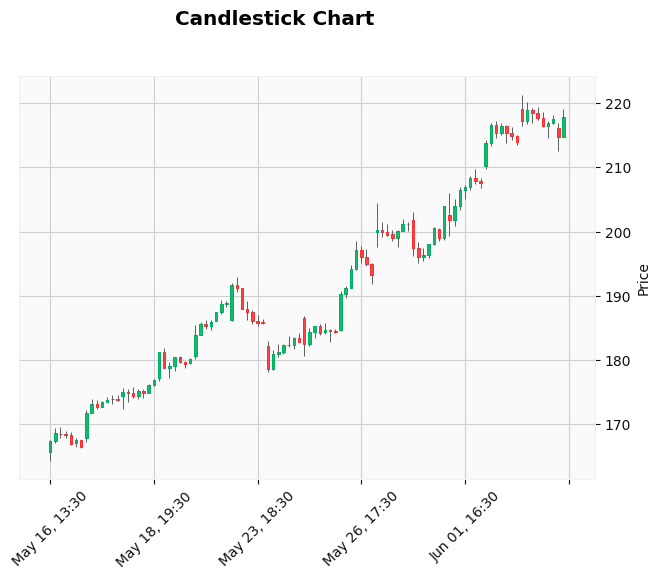

In [10]:
mpf.plot(df.iloc[0:100, 0:5], type='candle', title='Candlestick Chart', style='yahoo')

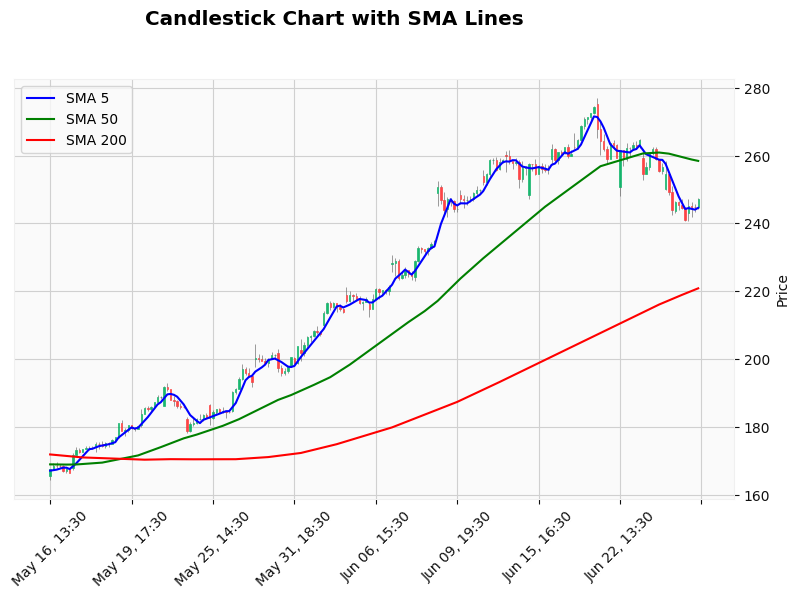

In [11]:
add_sma_5 = mpf.make_addplot(df.iloc[0:200]['SMA_5'], color='blue', width=1.5, label='SMA 5')
add_sma_50 = mpf.make_addplot(df.iloc[0:200]['SMA_50'], color='green', width=1.5, label='SMA 50')
add_sma_200 = mpf.make_addplot(df.iloc[0:200]['SMA_200'], color='red', width=1.5, label='SMA 200')

# Plot the candlestick chart with the SMAs
mpf.plot(df.iloc[0:200, 0:5], type='candle', addplot=[add_sma_5, add_sma_50, add_sma_200],
         title='Candlestick Chart with SMA Lines', style='yahoo', figsize=(10, 6))

# grouping data to be able to test it on different time frames

In [15]:
# Group by week (assuming 7 rows/day)
weekly_groups = df.groupby(pd.Grouper(freq='W-MON'))  # Weeks start Monday

# Group by month
monthly_groups = df.groupby(pd.Grouper(freq='ME'))     # Calendar month-end

# Group by season (if you have a 'season' column)
seasonal_groups = df.groupby('season')                # Winter, Spring, etc.

In [17]:
weekly_groups.size(), monthly_groups.size(), seasonal_groups.size()
# Plotting the weekly data      

(Datetime
 2023-05-22    35
 2023-05-29    28
 2023-06-05    35
 2023-06-12    35
 2023-06-19    28
               ..
 2025-03-10    35
 2025-03-17    35
 2025-03-24    35
 2025-03-31    35
 2025-04-07     7
 Freq: W-MON, Length: 99, dtype: int64,
 Datetime
 2023-05-31     77
 2023-06-30    147
 2023-07-31    136
 2023-08-31    161
 2023-09-30    140
 2023-10-31    154
 2023-11-30    143
 2023-12-31    140
 2024-01-31    147
 2024-02-29    140
 2024-03-31    140
 2024-04-30    154
 2024-05-31    154
 2024-06-30    133
 2024-07-31    150
 2024-08-31    154
 2024-09-30    140
 2024-10-31    161
 2024-11-30    136
 2024-12-31    143
 2025-01-31    140
 2025-02-28    133
 2025-03-31    147
 2025-04-30      7
 Freq: ME, dtype: int64,
 season
 Fall      874
 Spring    679
 Summer    881
 Winter    843
 dtype: int64)

In [45]:
# Group by Year-Week (weeks start Monday)
weekly_groups = {
    (week.year, week.isocalendar().week): week_data 
    for week, week_data in df.groupby(pd.Grouper(freq='W-MON'))
    if len(week_data) >= 4 * 7  # Ensure full week
}


In [46]:
weekly_groups.keys()

dict_keys([(2023, 21), (2023, 22), (2023, 23), (2023, 24), (2023, 25), (2023, 26), (2023, 27), (2023, 28), (2023, 29), (2023, 30), (2023, 31), (2023, 32), (2023, 33), (2023, 34), (2023, 35), (2023, 36), (2023, 37), (2023, 38), (2023, 39), (2023, 40), (2023, 41), (2023, 42), (2023, 43), (2023, 44), (2023, 45), (2023, 46), (2023, 47), (2023, 49), (2023, 50), (2023, 51), (2023, 52), (2024, 1), (2024, 2), (2024, 3), (2024, 4), (2024, 5), (2024, 6), (2024, 7), (2024, 8), (2024, 9), (2024, 10), (2024, 11), (2024, 12), (2024, 13), (2024, 14), (2024, 15), (2024, 16), (2024, 17), (2024, 18), (2024, 19), (2024, 20), (2024, 21), (2024, 22), (2024, 23), (2024, 24), (2024, 25), (2024, 26), (2024, 27), (2024, 29), (2024, 30), (2024, 31), (2024, 32), (2024, 33), (2024, 34), (2024, 35), (2024, 36), (2024, 37), (2024, 38), (2024, 39), (2024, 40), (2024, 41), (2024, 42), (2024, 43), (2024, 44), (2024, 45), (2024, 46), (2024, 47), (2024, 48), (2024, 50), (2024, 51), (2024, 52), (2025, 2), (2025, 3), (202

In [55]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_20', 'SMA_50',
       'SMA_200', 'EMA_5', 'EMA_20', 'EMA_50', 'EMA_200', 'RSI', 'ATR', 'MACD',
       'MACD_Signal', 'Bollinger_Upper', 'Bollinger_Mid', 'Bollinger_Lower',
       'VWAP', 'Candle_Width', '% Change', 'OBV', 'Cumulative_Return',
       'day_of_week', 'day_name', 'is_weekend', 'month', 'month_name',
       'month_abbr', 'season'],
      dtype='object')

In [47]:
weekly_groups[(2023, 21)]

,Open,High,Low,Close,Volume,SMA_5,SMA_20,SMA_50,SMA_200,EMA_5,...,% Change,OBV,Cumulative_Return,day_of_week,day_name,is_weekend,month,month_name,month_abbr,season
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-16 13:30:00,165.649994,167.559998,164.350006,167.470001,28269977,167.080981,168.381561,168.941085,171.868285,167.032537,...,0.670257,3287592582,-0.135505,1,Tuesday,False,5,May,May,Spring
2023-05-16 14:30:00,167.449997,169.419998,167.160004,168.580002,18020917,167.182980,168.367776,168.975285,171.754886,167.548359,...,0.662806,3323634415,-0.129775,1,Tuesday,False,5,May,May,Spring
2023-05-16 15:30:00,168.564896,169.518402,167.919998,168.429993,11617670,167.384979,168.334251,168.972435,171.641835,167.842237,...,-0.088984,3323634414,-0.130549,1,Tuesday,False,5,May,May,Spring
2023-05-16 16:30:00,168.421997,168.970001,167.854996,168.316895,9570871,167.830377,168.280591,168.976173,171.520020,168.000456,...,-0.067148,3323634413,-0.131133,1,Tuesday,False,5,May,May,Spring
2023-05-16 17:30:00,168.320099,168.860001,166.759995,166.999893,10569064,167.959357,168.133585,168.931771,171.418500,167.666935,...,-0.782453,3323634412,-0.137932,1,Tuesday,False,5,May,May,Spring
2023-05-16 18:30:00,167.020004,167.860001,166.509995,167.500000,9363773,167.965356,167.905585,168.879135,171.332051,167.611290,...,0.299465,3342361957,-0.135350,1,Tuesday,False,5,May,May,Spring
2023-05-16 19:30:00,167.500000,167.539993,166.389999,166.529999,6194362,167.555356,167.633435,168.806535,171.240901,167.250860,...,-0.579105,3342361956,-0.140357,1,Tuesday,False,5,May,May,Spring
2023-05-17 13:30:00,167.875000,172.289902,167.184998,171.817993,40007779,168.232956,167.714085,168.841494,171.171391,168.773237,...,3.175400,3422377513,-0.113060,2,Wednesday,False,5,May,May,Spring
2023-05-17 14:30:00,171.820007,173.990005,171.809998,173.229996,26944673,169.215576,167.976409,168.909494,171.109240,170.258824,...,0.821801,3476266858,-0.105771,2,Wednesday,False,5,May,May,Spring


In [49]:
# --- Group by Year + Season ---
seasonal_groups = {
    (year.year, season): season_data 
    for (year, season), season_data in df.groupby([pd.Grouper(freq='Y'), 'season'])
}

# Print all seasonal groups
print("Seasonal Groups (Year, Season):")
for (year, season), data in seasonal_groups.items():
    print(f"{year} {season}: {len(data)} rows")

# --- Group by Year + Month ---
monthly_groups = {
    (month.year, month.month): month_data 
    for month, month_data in df.groupby(pd.Grouper(freq='M'))
}

# Print all monthly groups
print("\nMonthly Groups (Year, Month):")
for (year, month), data in monthly_groups.items():
    print(f"{year}-{month:02d}: {len(data)} rows")

Seasonal Groups (Year, Season):
2023 Fall: 437 rows
2023 Spring: 77 rows
2023 Summer: 444 rows
2023 Winter: 140 rows
2024 Fall: 437 rows
2024 Spring: 448 rows
2024 Summer: 437 rows
2024 Winter: 430 rows
2025 Spring: 154 rows
2025 Winter: 273 rows

Monthly Groups (Year, Month):
2023-05: 77 rows
2023-06: 147 rows
2023-07: 136 rows
2023-08: 161 rows
2023-09: 140 rows
2023-10: 154 rows
2023-11: 143 rows
2023-12: 140 rows
2024-01: 147 rows
2024-02: 140 rows
2024-03: 140 rows
2024-04: 154 rows
2024-05: 154 rows
2024-06: 133 rows
2024-07: 150 rows
2024-08: 154 rows
2024-09: 140 rows
2024-10: 161 rows
2024-11: 136 rows
2024-12: 143 rows
2025-01: 140 rows
2025-02: 133 rows
2025-03: 147 rows
2025-04: 7 rows


C:\Users\kiara\AppData\Local\Temp\ipykernel_49996\1245039033.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  for (year, season), season_data in df.groupby([pd.Grouper(freq='Y'), 'season'])
C:\Users\kiara\AppData\Local\Temp\ipykernel_49996\1245039033.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for month, month_data in df.groupby(pd.Grouper(freq='M'))


## Analysing weeks data

### now let's get how many weeks in general the trend was rising

In [52]:
num_of_weeks_with_profit = 0
num_of_weeks_without_profit = 0
avarege_loss_in_weeks_without_profit = 0
avarege_profit_in_weeks_with_profit = 0
for value in weekly_groups.values():
    week_profit = value["Cumulative_Return"].sum()
    if week_profit > 0:
        num_of_weeks_with_profit += 1
        avarege_profit_in_weeks_with_profit += week_profit
    else:
        num_of_weeks_without_profit += 1
        avarege_loss_in_weeks_without_profit += week_profit

avarege_profit_in_weeks_with_profit /= num_of_weeks_with_profit
avarege_loss_in_weeks_without_profit /= num_of_weeks_without_profit


print("Number of weeks profiting: ", num_of_weeks_with_profit)
print("Avarage profit in profiting weeks", avarege_profit_in_weeks_with_profit)

print("Number of weeks in loss: ", num_of_weeks_without_profit)
print("Avarage loss in loss weeks", avarege_loss_in_weeks_without_profit)

Number of weeks profiting:  73
Avarage profit in profiting weeks 12.457129697403488
Number of weeks in loss:  21
Avarage loss in loss weeks -2.9780254939838455


**This means that clearly our trend is a upward trend and therefore using algorithms based on SMA and EMA would work just fine.
This is if we are considering to work with data in chuncks of data as weeks and not month. For the months we will look into it later.**

### Now let's get the top weeks in which the market was loosing money and the weeks when market was so unstable

this will provide us insights on in real world how the stock price is affected by poletical things

In [78]:
man_len = 9

curcular_loosing_list = [(0,0) for i in range(10)]
add_index_loosing = 0

curcular_profiting_list = [(0,0) for i in range(10)]
add_index_prifiting = 0

for key, value in weekly_groups.items():
    week_profit = value["Cumulative_Return"].sum()
    if week_profit > max(curcular_profiting_list, key=lambda x: x[1])[1] or (add_index_prifiting < 9 and week_profit > 0):
        curcular_profiting_list[add_index_prifiting % 10] = (key, week_profit)
        add_index_prifiting += 1
    elif week_profit < min(curcular_loosing_list, key=lambda x: x[1])[1] or (add_index_loosing < 9 and week_profit < 0):
        curcular_loosing_list[add_index_loosing % 10] = (key, week_profit)
        add_index_loosing += 1




In [68]:
from pprint import pprint

In [79]:
curcular_loosing_list.sort(key=lambda x: x[1])
curcular_profiting_list.sort(key=lambda x: x[1], reverse=True)

pprint("Most profiting weeks:")
pprint(curcular_profiting_list)
pprint("Most losing weeks:")
pprint(curcular_loosing_list)

'Most profiting weeks:'
[((2024, 52), np.float64(45.986266774861384)),
 ((2024, 51), np.float64(41.960879149477705)),
 ((2024, 50), np.float64(31.42742961871774)),
 ((2024, 48), np.float64(27.296129047198363)),
 ((2024, 47), np.float64(24.146766045712937)),
 ((2024, 46), np.float64(19.336096330439155)),
 ((2023, 29), np.float64(15.064687907669644)),
 ((2023, 30), np.float64(14.8701348825903)),
 ((2023, 31), np.float64(12.935834555406945)),
 ((2023, 28), np.float64(11.886826762649244))]
'Most losing weeks:'
[((2024, 17), np.float64(-7.771595652489852)),
 ((2024, 15), np.float64(-4.448316720535786)),
 ((2024, 12), np.float64(-4.358846041088056)),
 ((2024, 13), np.float64(-3.9006073268970276)),
 ((2024, 11), np.float64(-2.8340911529115456)),
 ((2024, 14), np.float64(-2.380388328775253)),
 ((2024, 6), np.float64(-1.2043750631124985)),
 ((2023, 22), np.float64(-0.9762422262645464)),
 ((2024, 7), np.float64(-0.9201850809501106)),
 ((2024, 8), np.float64(-0.2554853897018704))]


In [63]:
# Calculate instability scores for each week
instability_scores = []
for week_name, week_data in weekly_groups.items():
    # Calculate metrics (using existing features)
    volatility = week_data['% Change'].std()  # Standard deviation of daily returns
    avg_atr = week_data['ATR'].mean()        # Average True Range
    avg_candle_width = week_data['High'].sub(week_data['Low']).mean()  # Average High-Low range
    rsi_extremes = ((week_data['RSI'] > 70) | (week_data['RSI'] < 30)).mean()  # % of extreme RSI readings
    
    # Composite instability score (customize weights as needed)
    score = 0.4*avg_atr + 0.3*volatility + 0.2*avg_candle_width + 0.1*rsi_extremes
    instability_scores.append((week_name, score))

# Convert to DataFrame and sort
instability_df = pd.DataFrame(
    instability_scores, 
    columns=['Week_Start_Date', 'Instability_Score']
).sort_values('Instability_Score', ascending=False)

# Display top 10 most unstable weeks
print("Top 10 Unstable Weeks:")
print(instability_df.head(13))

Top 10 Unstable Weeks:
   Week_Start_Date  Instability_Score
80      (2024, 52)           7.516083
90      (2025, 11)           5.289793
89      (2025, 10)           5.279336
76      (2024, 47)           5.245490
82       (2025, 3)           5.200147
81       (2025, 2)           5.182669
83       (2025, 4)           4.967543
85       (2025, 6)           4.785481
75      (2024, 46)           4.553667
79      (2024, 51)           4.507154
91      (2025, 12)           4.500884
93      (2025, 14)           4.275678
87       (2025, 8)           4.000503


## Results on the anomoly

### October 28th 2024 till early 2025

**The biggest growth and volitility on the Tesla company was in this time.
at first with the elections and the chances of Trump winning Tesla grow so much, as Ellon Musk was the biggest sponser of Donold Trump, with lotteries for voting for him and funding campains and etc... . for this reason hopes on the Tesla company rose and he had so much growth till 2025.
after that the added tariffs on U.S imports in China which is the biggest market and other companies that came and made the competition on electric cars much more, the stock of Tesla company experienced a signigicant drop.
During this time the market was highly unstable.**

This is a detailed version

1. Trade Tensions with China
In late 2024, China imposed a 34% tariff on U.S. imports, including Tesla vehicles. This was a retaliatory measure in an ongoing trade war, which had been escalating due to U.S. policies on tariffs and restrictions on Chinese goods. For Tesla, this was a significant blow, as China is one of its largest markets. The increased tariffs made Tesla cars more expensive in China, potentially reducing demand and impacting Tesla's revenue. This geopolitical tension likely contributed to fluctuations in Tesla's stock price during this period.

2. Tesla Stock Performance
Tesla's stock experienced notable volatility in late 2024. It reached a 52-week high of $488.54 in December 2024, driven by optimism following the U.S. presidential election. However, concerns over trade tensions with China and increasing competition in the EV market led to declines in early 2025. Tesla's stock performance was also influenced by broader market trends and investor sentiment, which were shaped by political and economic developments.

3. Global EV Market Dynamics
The global electric vehicle (EV) market saw significant growth in 2024, with increasing competition from Chinese and European manufacturers. Tesla faced challenges in maintaining its market share, particularly in China, where domestic EV makers like BYD and Nio were gaining ground. In Europe, Tesla's market share also showed signs of decline, despite overall growth in EV registrations. These dynamics added pressure on Tesla to innovate and adapt to a rapidly evolving market.

4. Political Developments
The U.S. presidential election in November 2024 had a profound impact on financial markets. The election results influenced investor sentiment, particularly regarding trade policies and environmental regulations. A Republican victory brought expectations of extended tax cuts and potential changes in trade policies, which initially boosted market optimism. However, the implications of these policies, including their impact on trade relations with China, created uncertainty for companies like Tesla.

### Weeks 27 to 31 of 2023

**This was the second significant time that contributed to rise in the stock of Tesla company.**

1. Economic Developments
The global economy faced challenges during this period, including inflation concerns and interest rate hikes by central banks. These factors influenced investor sentiment and impacted stock markets, including Tesla's performance.

2. Tesla's Earnings Report
Tesla released its Q2 2023 earnings report in late July. The report highlighted strong revenue growth driven by increased vehicle deliveries, but also revealed challenges such as rising production costs and supply chain issues. The earnings report likely influenced Tesla's stock price during this time.

3. EV Market Trends
The electric vehicle market continued to grow, with increasing competition from other manufacturers. Tesla faced pressure to maintain its market share amidst the rise of new EV models from competitors like Rivian and Lucid Motors.

4. Political and Regulatory Changes
There were discussions about new environmental regulations and incentives for EVs in the U.S. and Europe. These developments could have impacted Tesla's strategic decisions and investor outlook.